# UK Gender Pay Gap Analysis Final Report

Anusha Ramprasad, Bea Igbokwe, Nivedita Ravi
<br>
December 7, 2021

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning
<br>
To start the analysis of the UK gender pay gap, we read the csv files for the years 2019 through 2021, omitting columns that would not be utilized within our analysis. We determined the columns pertaining to income and employer size for each company would be our focus for this analysis. By observing the info for each dataset, we could conclude the size of our datasets and which columns contained null values.

In [3]:
gpg_2021 = pd.read_csv("https://gender-pay-gap.service.gov.uk/viewing/download-data/2021")

In [4]:
gpg_21 = gpg_2021.drop(["Address", "PostCode", "CompanyNumber", "SicCodes", "ResponsiblePerson", "CompanyLinkToGPGInfo", "CurrentName", "DueDate","EmployerId", "DateSubmitted" ], axis = 1)

In [5]:
gpg_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10492 entries, 0 to 10491
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               10492 non-null  object 
 1   DiffMeanHourlyPercent      10492 non-null  float64
 2   DiffMedianHourlyPercent    10492 non-null  float64
 3   DiffMeanBonusPercent       7685 non-null   float64
 4   DiffMedianBonusPercent     7685 non-null   float64
 5   MaleBonusPercent           10492 non-null  float64
 6   FemaleBonusPercent         10492 non-null  float64
 7   MaleLowerQuartile          10295 non-null  float64
 8   FemaleLowerQuartile        10295 non-null  float64
 9   MaleLowerMiddleQuartile    10295 non-null  float64
 10  FemaleLowerMiddleQuartile  10295 non-null  float64
 11  MaleUpperMiddleQuartile    10295 non-null  float64
 12  FemaleUpperMiddleQuartile  10295 non-null  float64
 13  MaleTopQuartile            10295 non-null  flo

In [6]:
gpg_20 = pd.read_csv("https://gender-pay-gap.service.gov.uk/viewing/download-data/2020", 
                     usecols=['DiffMeanBonusPercent',
 'DiffMeanHourlyPercent',
 'DiffMedianBonusPercent',
 'DiffMedianHourlyPercent',
 'EmployerName',
 'EmployerSize',
 'FemaleBonusPercent',
 'FemaleLowerMiddleQuartile',
 'FemaleLowerQuartile',
 'FemaleTopQuartile',
 'FemaleUpperMiddleQuartile',
 'MaleBonusPercent',
 'MaleLowerMiddleQuartile',
 'MaleLowerQuartile',
 'MaleTopQuartile',
 'MaleUpperMiddleQuartile',
 'SubmittedAfterTheDeadline'])

In [7]:
gpg_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               10532 non-null  object 
 1   DiffMeanHourlyPercent      10532 non-null  float64
 2   DiffMedianHourlyPercent    10532 non-null  float64
 3   DiffMeanBonusPercent       7894 non-null   float64
 4   DiffMedianBonusPercent     7894 non-null   float64
 5   MaleBonusPercent           10532 non-null  float64
 6   FemaleBonusPercent         10532 non-null  float64
 7   MaleLowerQuartile          10332 non-null  float64
 8   FemaleLowerQuartile        10332 non-null  float64
 9   MaleLowerMiddleQuartile    10332 non-null  float64
 10  FemaleLowerMiddleQuartile  10332 non-null  float64
 11  MaleUpperMiddleQuartile    10332 non-null  float64
 12  FemaleUpperMiddleQuartile  10332 non-null  float64
 13  MaleTopQuartile            10332 non-null  flo

In [8]:
gpg_19 = pd.read_csv("https://gender-pay-gap.service.gov.uk/viewing/download-data/2019", 
                     usecols=['DiffMeanBonusPercent',
 'DiffMeanHourlyPercent',
 'DiffMedianBonusPercent',
 'DiffMedianHourlyPercent',
 'EmployerName',
 'EmployerSize',
 'FemaleBonusPercent',
 'FemaleLowerMiddleQuartile',
 'FemaleLowerQuartile',
 'FemaleTopQuartile',
 'FemaleUpperMiddleQuartile',
 'MaleBonusPercent',
 'MaleLowerMiddleQuartile',
 'MaleLowerQuartile',
 'MaleTopQuartile',
 'MaleUpperMiddleQuartile',
 'SubmittedAfterTheDeadline'])

In [9]:
gpg_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6921 entries, 0 to 6920
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               6921 non-null   object 
 1   DiffMeanHourlyPercent      6921 non-null   float64
 2   DiffMedianHourlyPercent    6921 non-null   float64
 3   DiffMeanBonusPercent       5205 non-null   float64
 4   DiffMedianBonusPercent     5203 non-null   float64
 5   MaleBonusPercent           6921 non-null   float64
 6   FemaleBonusPercent         6921 non-null   float64
 7   MaleLowerQuartile          6921 non-null   float64
 8   FemaleLowerQuartile        6921 non-null   float64
 9   MaleLowerMiddleQuartile    6921 non-null   float64
 10  FemaleLowerMiddleQuartile  6921 non-null   float64
 11  MaleUpperMiddleQuartile    6921 non-null   float64
 12  FemaleUpperMiddleQuartile  6921 non-null   float64
 13  MaleTopQuartile            6921 non-null   float

## Data Exploration of Employer Size

Next, we wanted to observe the difference in pay disparity based on the employer size. Focusing on the datasets for the years 2019 and 2021, we created visualizations to analyze how employer size changes the hourly pay for men and women.

In [10]:
gpg_21['EmployerSize'].unique()

array(['1000 to 4999', '250 to 499', 'Less than 250', '5000 to 19,999',
       '500 to 999', 'Not Provided', '20,000 or more'], dtype=object)

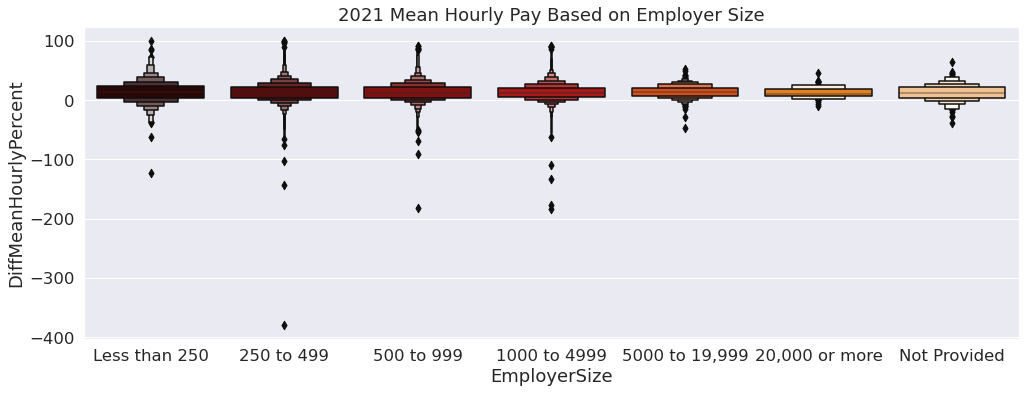

In [45]:
sns.set(rc={'figure.figsize':(16.75,5.75)}, font_scale = 1.5)
sns.boxenplot(data=gpg_21, 
            x = "EmployerSize", 
            y = "DiffMeanHourlyPercent",
            order = ["Less than 250", "250 to 499", "500 to 999", "1000 to 4999",
                    "5000 to 19,999", "20,000 or more", "Not Provided"],
            palette = "gist_heat").set(title='2021 Mean Hourly Pay Based on Employer Size')
plt.savefig('EmplySize21.pdf')

From looking at the visualization, it appears there are extreme outliers for women, as the negative values represent bias for women. These outliers appear to be more apparent for employer sizes less than 5000. Despite the outliers representing women, the boxplots show the average mean hourly pay favors men as it is above 0.

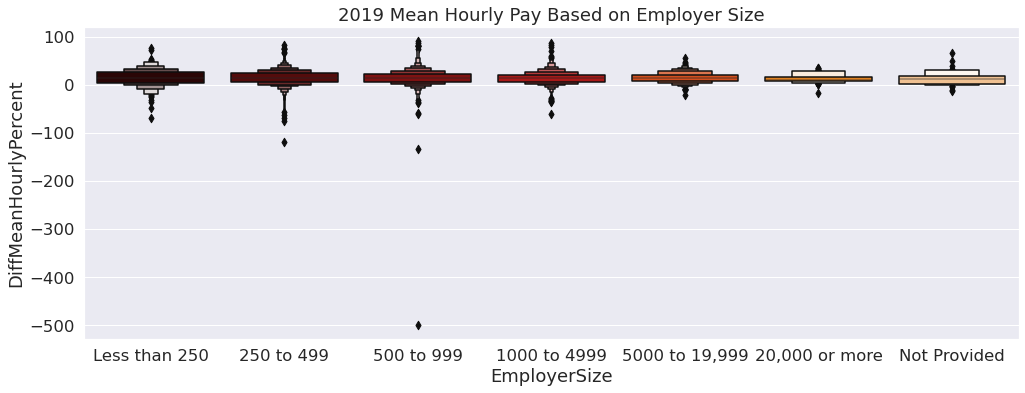

In [46]:
sns.set(rc={'figure.figsize':(16.75,5.75)}, font_scale = 1.5)
sns.boxenplot(data=gpg_19, 
            x = "EmployerSize", 
            y = "DiffMeanHourlyPercent",
            order = ["Less than 250", "250 to 499", "500 to 999", "1000 to 4999",
                    "5000 to 19,999", "20,000 or more", "Not Provided"],
            palette = "gist_heat").set(title='2019 Mean Hourly Pay Based on Employer Size')
plt.savefig('EmplySize19.pdf')

Similarly to the boxplot for 2021, there are extreme outliers for the women who have an hourly pay largerly greater than the average. For this year, however, there is less of a disparity with the gap appearing to be smaller between men and women. Some factors for this could be related to the amount of data received for this year compared to 2021 and prehaps an increase in diversity of job roles.

## Data Exploration by Employer

In [13]:
top5_21 = gpg_21.nlargest(5, 'DiffMedianHourlyPercent')
top5_21

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,SubmittedAfterTheDeadline
689,ATFC LIMITED,0.0,100.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250 to 499,False
4343,HPI UK HOLDING LTD.,100.0,100.0,2.0,59.0,11.0,4.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,250 to 499,False
5517,M. ANDERSON CONSTRUCTION LIMITED,100.0,100.0,100.0,100.0,14.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,250 to 499,False
7197,PSJ FABRICATIONS LTD,100.0,100.0,100.0,100.0,3.7,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,Less than 250,False
4369,HULL COLLABORATIVE ACADEMY TRUST,45.0,93.0,NaN,NaN,0.0,0.0,3.0,97.0,3.0,97.0,17.0,83.0,17.0,83.0,Not Provided,False


<AxesSubplot:xlabel='DiffMedianHourlyPercent', ylabel='EmployerName'>

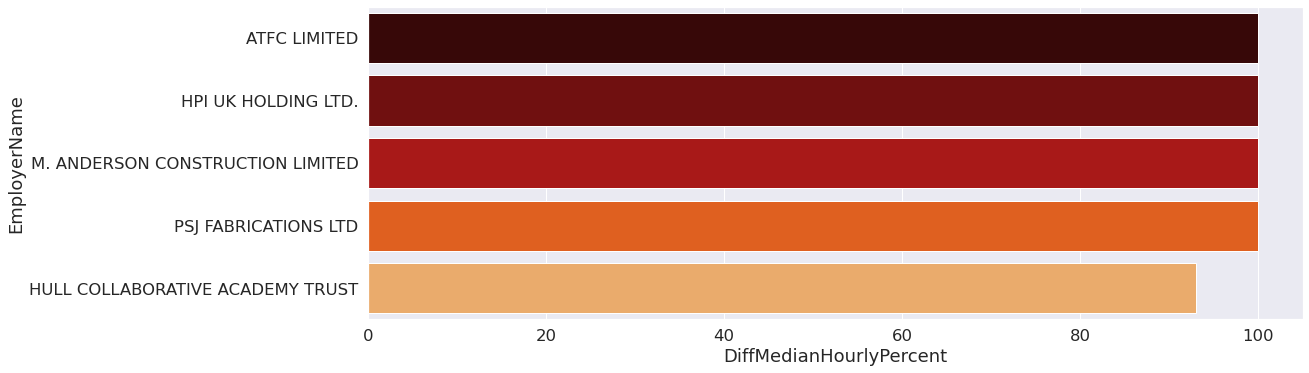

In [14]:
sns.barplot(data=top5_21,
            y = "EmployerName",
            x = 'DiffMedianHourlyPercent', 
            orient = "h",
           palette = "gist_heat")

In [15]:
last5_21 = gpg_21.nsmallest(5, 'DiffMedianHourlyPercent')
last5_21

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,SubmittedAfterTheDeadline
472,ANKH CONCEPTS HOSPITALITY MANAGEMENT LIMITED,-379.6,-499.5,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250 to 499,True
7256,QUEST PAY SOLUTIONS NE LIMITED,-90.0,-131.0,NaN,NaN,0.0,0.0,95.0,5.0,92.0,8.0,95.0,5.0,29.0,71.0,500 to 999,True
3449,FORTEL SERVICES LIMITED,-184.2,-128.8,63.5,-6.7,12.9,30.4,93.4,6.6,99.0,1.0,96.1,3.9,99.5,0.5,1000 to 4999,False
7522,RLC (UK) LIMITED,-40.9,-121.5,30.9,0.0,15.5,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250 to 499,False
6180,NCR UK GROUP LIMITED,-53.0,-104.0,-105.0,-326.0,97.0,95.0,97.0,3.0,97.0,3.0,87.0,13.0,83.0,17.0,500 to 999,False


<AxesSubplot:xlabel='DiffMedianHourlyPercent', ylabel='EmployerName'>

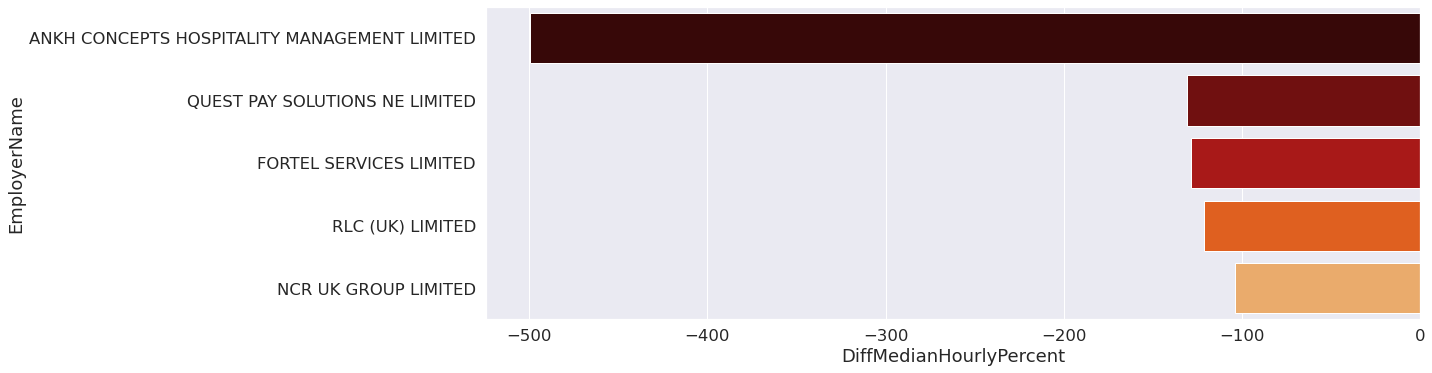

In [16]:
sns.barplot(data=last5_21,
            y = "EmployerName",
            x = 'DiffMedianHourlyPercent', 
            orient = "h",
           palette = "gist_heat")

### Data Transformation for Visual Data Exploration

In [17]:
high_low_21 = pd.concat([top5_21, last5_21], axis = 0)

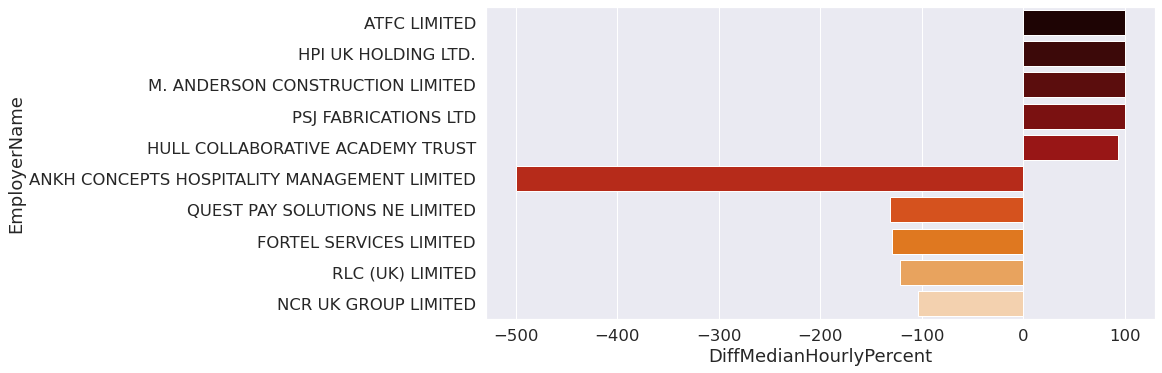

In [18]:
sns.set(rc={'figure.figsize':(12,5.75)}, font_scale = 1.5)
sns.barplot(data=high_low_21,
            y = "EmployerName",
            x = 'DiffMedianHourlyPercent', 
            orient = "h",
           palette = "gist_heat")

plt.savefig('DiffMedianBar1.pdf')

## Data Transformation for Final Analysis

In [19]:
gpg_19["Year"] = 2019
gpg_20["Year"] = 2020
gpg_21["Year"] = 2021

In [20]:
#MERGING DATAFRAMES

merged = pd.concat([gpg_19, gpg_20], axis = 0)
final = pd.concat([merged,gpg_21], axis = 0)
final

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,SubmittedAfterTheDeadline,Year
0,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,11.5,10.3,NaN,NaN,0.0,0.0,53.0,47.0,41.0,59.0,40.0,60.0,62.0,38.0,1000 to 4999,False,2019
1,10 TRINITY SQUARE HOTEL LIMITED,8.7,10.3,29.6,54.5,90.5,90.5,47.9,52.1,56.3,43.7,78.9,21.1,66.7,33.3,250 to 499,False,2019
2,1LIFE MANAGEMENT SOLUTIONS LIMITED,11.0,-0.5,81.5,94.2,10.0,11.4,49.0,51.0,35.3,64.7,42.3,57.7,44.2,55.8,250 to 499,False,2019
3,1ST CHOICE STAFF RECRUITMENT LIMITED,-2.3,0.0,-114.8,-249.3,1.1,0.4,50.8,49.2,67.7,32.3,62.9,37.1,50.0,50.0,250 to 499,False,2019
4,1ST HOME CARE LTD.,-2.0,0.5,NaN,NaN,0.0,0.0,10.0,90.0,8.0,92.0,9.0,91.0,9.0,91.0,250 to 499,False,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,ZPG LIMITED,22.4,22.4,72.7,15.9,16.0,15.0,45.7,54.3,52.6,47.4,57.7,42.3,70.9,29.1,500 to 999,False,2021
10488,ZURICH EMPLOYMENT SERVICES LIMITED,26.5,24.4,55.4,36.0,96.9,95.5,35.9,64.1,43.0,57.0,53.1,46.9,67.8,32.2,1000 to 4999,False,2021
10489,ZURICH UK GENERAL SERVICES LIMITED,16.7,19.7,56.8,45.1,97.3,96.7,41.5,58.5,66.8,33.2,66.0,34.0,69.3,30.7,1000 to 4999,False,2021
10490,ZUTO LIMITED,16.0,6.0,10.0,35.0,66.0,75.0,64.0,36.0,58.0,42.0,71.0,29.0,70.0,30.0,250 to 499,False,2021


In [21]:
#PERCENTAGES

MLQ_per = final['MaleLowerQuartile'].mean()
FLQ_per = final['FemaleLowerQuartile'].mean()
MaleLMQ_per = final['MaleLowerMiddleQuartile'].mean()
FemLMQ_per = final['FemaleLowerMiddleQuartile'].mean()
MaleUMQ_per = final['MaleUpperMiddleQuartile'].mean()
FemUMQ_per = final['FemaleUpperMiddleQuartile'].mean()
MaleTop_per = final['MaleTopQuartile'].mean()
FemTop_per = final['FemaleTopQuartile'].mean()

In [22]:
#REPLACING NULL VALUES WITH MEAN

meanBonus = final['DiffMeanBonusPercent'].mean()
medianBonus = final['DiffMedianBonusPercent'].mean()
mean_MaleLQ = final['MaleLowerQuartile'].mean()
mean_FemLQ = final['FemaleLowerQuartile'].mean()
mean_MaleLMQ = final['MaleLowerMiddleQuartile'].mean()
mean_FemLMQ = final['FemaleLowerMiddleQuartile'].mean()
mean_MaleUMQ = final['MaleUpperMiddleQuartile'].mean()
mean_FemUMQ = final['FemaleUpperMiddleQuartile'].mean()
mean_MaleTopQ = final['MaleTopQuartile'].mean()
mean_FemTopQ = final['FemaleTopQuartile'].mean()
final['DiffMeanBonusPercent'].fillna(value=meanBonus, inplace=True)
final['DiffMedianBonusPercent'].fillna(value=medianBonus, inplace=True)
final['MaleLowerQuartile'].fillna(value=mean_MaleLQ, inplace=True)
final['FemaleLowerQuartile'].fillna(value=mean_FemLQ, inplace=True)
final['MaleLowerMiddleQuartile'].fillna(value=mean_MaleLMQ, inplace=True)
final['FemaleLowerMiddleQuartile'].fillna(value=mean_FemLMQ, inplace=True)
final['MaleUpperMiddleQuartile'].fillna(value=mean_MaleUMQ, inplace=True)
final['FemaleUpperMiddleQuartile'].fillna(value=mean_FemUMQ, inplace=True)
final['MaleTopQuartile'].fillna(value=mean_MaleTopQ, inplace=True)
final['FemaleTopQuartile'].fillna(value=mean_FemTopQ, inplace=True)
final

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,SubmittedAfterTheDeadline,Year
0,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,11.5,10.3,21.101073,3.523732,0.0,0.0,53.0,47.0,41.0,59.0,40.0,60.0,62.0,38.0,1000 to 4999,False,2019
1,10 TRINITY SQUARE HOTEL LIMITED,8.7,10.3,29.600000,54.500000,90.5,90.5,47.9,52.1,56.3,43.7,78.9,21.1,66.7,33.3,250 to 499,False,2019
2,1LIFE MANAGEMENT SOLUTIONS LIMITED,11.0,-0.5,81.500000,94.200000,10.0,11.4,49.0,51.0,35.3,64.7,42.3,57.7,44.2,55.8,250 to 499,False,2019
3,1ST CHOICE STAFF RECRUITMENT LIMITED,-2.3,0.0,-114.800000,-249.300000,1.1,0.4,50.8,49.2,67.7,32.3,62.9,37.1,50.0,50.0,250 to 499,False,2019
4,1ST HOME CARE LTD.,-2.0,0.5,21.101073,3.523732,0.0,0.0,10.0,90.0,8.0,92.0,9.0,91.0,9.0,91.0,250 to 499,False,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,ZPG LIMITED,22.4,22.4,72.700000,15.900000,16.0,15.0,45.7,54.3,52.6,47.4,57.7,42.3,70.9,29.1,500 to 999,False,2021
10488,ZURICH EMPLOYMENT SERVICES LIMITED,26.5,24.4,55.400000,36.000000,96.9,95.5,35.9,64.1,43.0,57.0,53.1,46.9,67.8,32.2,1000 to 4999,False,2021
10489,ZURICH UK GENERAL SERVICES LIMITED,16.7,19.7,56.800000,45.100000,97.3,96.7,41.5,58.5,66.8,33.2,66.0,34.0,69.3,30.7,1000 to 4999,False,2021
10490,ZUTO LIMITED,16.0,6.0,10.000000,35.000000,66.0,75.0,64.0,36.0,58.0,42.0,71.0,29.0,70.0,30.0,250 to 499,False,2021


## Data Exploration for Final Analysis

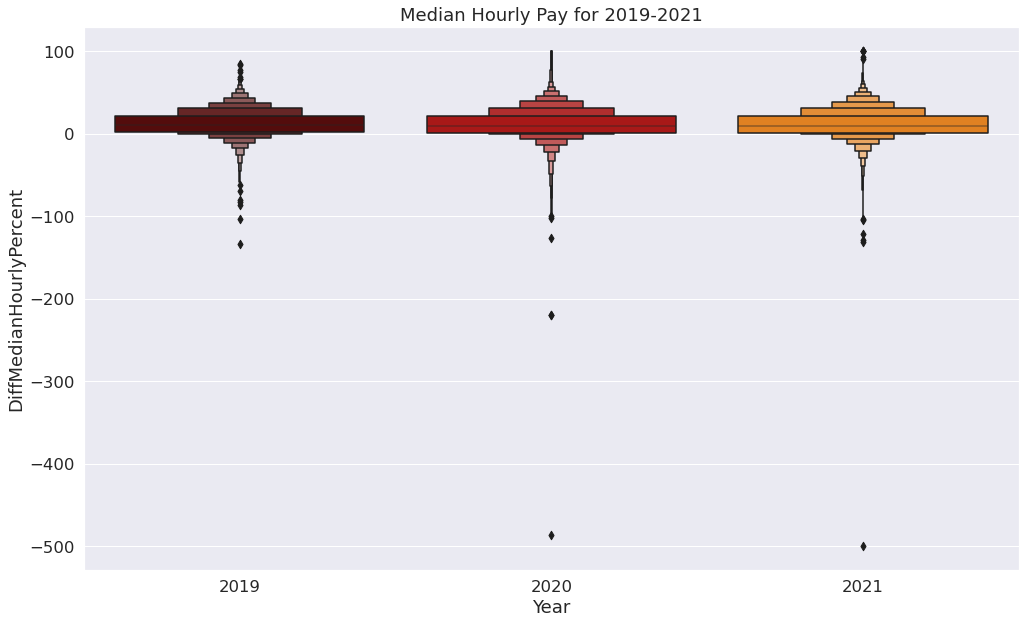

In [40]:
sns.boxenplot(data=final, 
            y = "DiffMedianHourlyPercent", 
            x = "Year",
            palette = "gist_heat").set(title="Median Hourly Pay for 2019-2021")

plt.savefig('DiffMedianYear.pdf')

[Text(0.5, 1.0, 'Mean Hourly Pay for 2019-2021')]

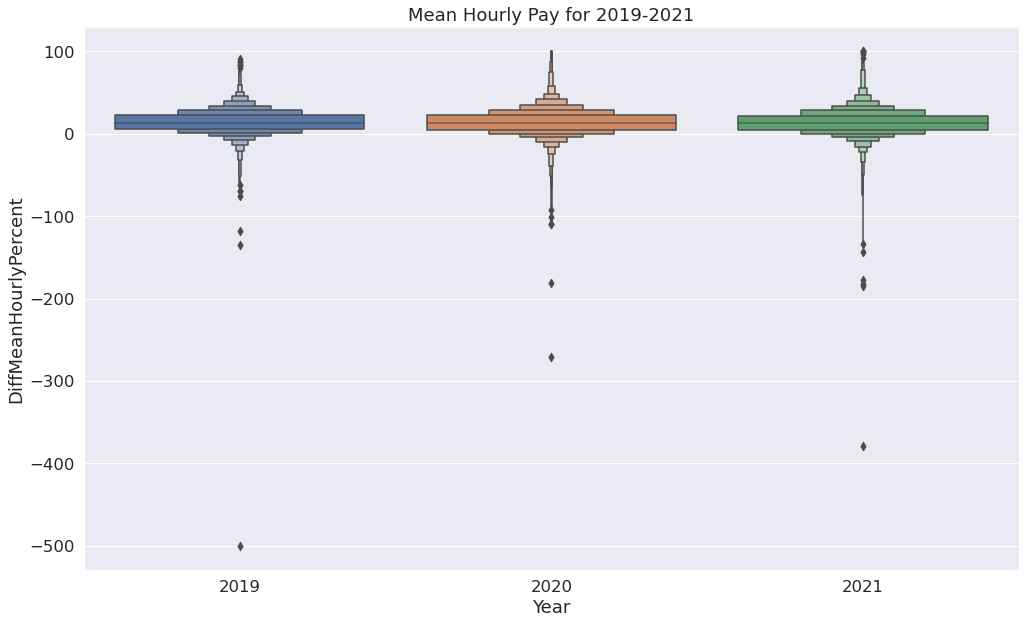

In [41]:
sns.boxenplot(data=final, 
            y = "DiffMeanHourlyPercent", 
            x = "Year").set(title="Mean Hourly Pay for 2019-2021")

<AxesSubplot:ylabel='Frequency'>

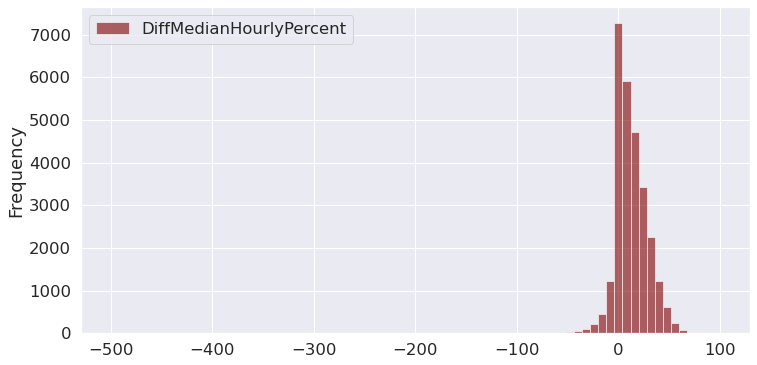

In [23]:
final['DiffMedianHourlyPercent'].plot(kind='hist', 
                                      bins=75, 
                                      figsize=[12,6], 
                                      alpha=.6, 
                                      legend=True, 
                                      color = 'maroon')

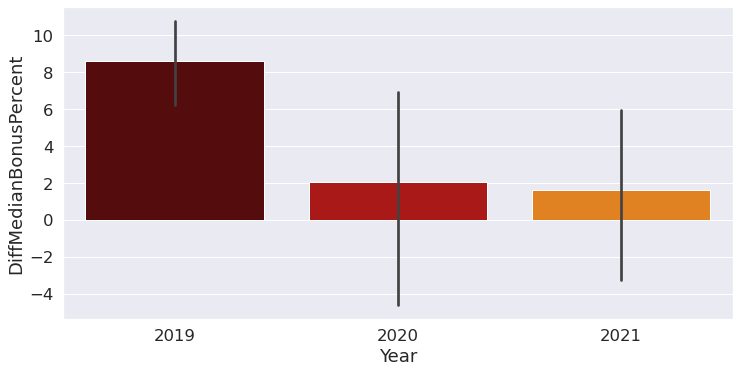

In [28]:
sns.barplot(data=final, 
            y = "DiffMedianBonusPercent", 
            x = "Year",
            palette = "gist_heat")
plt.savefig('YearDiffMedBonus.pdf')

<AxesSubplot:xlabel='Year', ylabel='DiffMeanBonusPercent'>

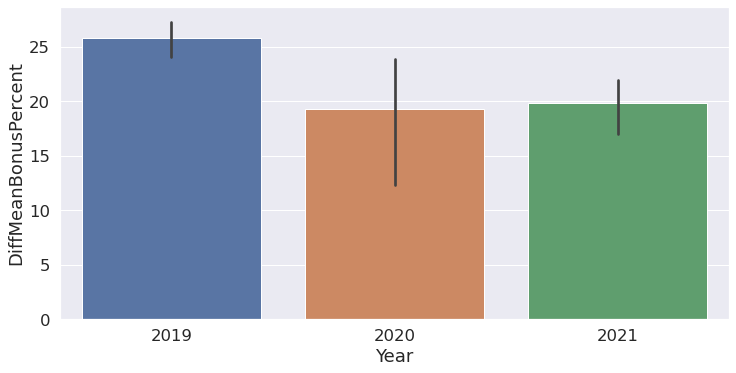

In [30]:
sns.barplot(data=final, 
            y = "DiffMeanBonusPercent", 
            x = "Year")

<AxesSubplot:ylabel='Frequency'>

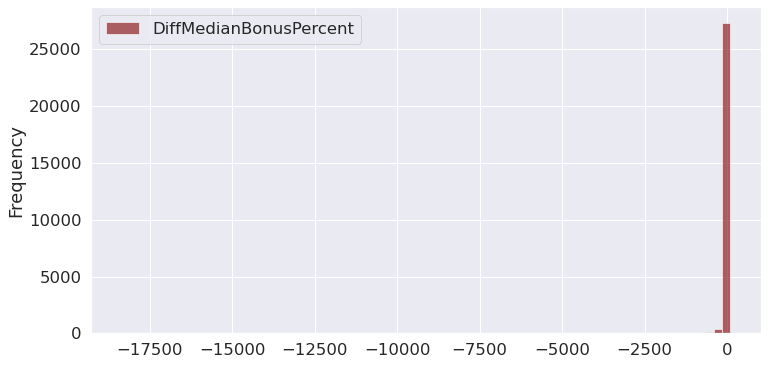

In [24]:
final['DiffMedianBonusPercent'].plot(kind='hist', 
                                      bins=75, 
                                      figsize=[12,6], 
                                      alpha=.6, 
                                      legend=True, 
                                      color = 'maroon')

### Male to Female Ratio

In [26]:
data = [{'Male': MLQ_per, 'Female': FLQ_per}, {'Male': MaleLMQ_per , 'Female': FemLMQ_per}, {'Male': MaleUMQ_per , 'Female':FemUMQ_per}, {'Male': MaleTop_per, 'Female': FemTop_per}]
percent= pd.DataFrame(data, index=["Lower_Quartile","LowerMiddle_Quartile","UpperMiddle_Quartile","Top_Quartile"])
percent

,Male,Female
Lower_Quartile,45.353374,54.646626
LowerMiddle_Quartile,49.841387,50.158613
UpperMiddle_Quartile,54.243593,45.756407
Top_Quartile,59.742682,40.257318


### 

In [31]:
final.small = final.nsmallest(5, 'DiffMedianHourlyPercent')
final.large = final.nlargest(5, 'DiffMedianHourlyPercent')
final.highlow = pd.concat([final.small,final.large], axis = 0)

/tmp/ipykernel_131/3621132997.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  final.small = final.nsmallest(5, 'DiffMedianHourlyPercent')
/tmp/ipykernel_131/3621132997.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  final.large = final.nlargest(5, 'DiffMedianHourlyPercent')
/tmp/ipykernel_131/3621132997.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  final.highlow = pd.concat([final.small,final.large], axis = 0)


In [32]:
final.highlow

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,SubmittedAfterTheDeadline,Year
472,ANKH CONCEPTS HOSPITALITY MANAGEMENT LIMITED,-379.6,-499.5,21.101073,3.523732,0.0,0.0,45.353374,54.646626,49.841387,50.158613,54.243593,45.756407,59.742682,40.257318,250 to 499,True,2021
6518,NSS CLEANING LIMITED,-181.3,-487.2,-9087.300000,-14967.100000,12.3,5.3,98.200000,1.800000,100.000000,0.000000,100.000000,0.000000,67.300000,32.700000,250 to 499,True,2020
726,AUTO-SLEEPERS GROUP LIMITED,-42.5,-220.3,10.300000,-5.900000,52.2,29.5,100.000000,0.000000,50.000000,50.000000,0.000000,100.000000,100.000000,0.000000,250 to 499,False,2020
727,AUTO-SLEEPERS INVESTMENTS LIMITED,-42.5,-220.3,10.300000,-5.900000,52.2,29.5,100.000000,0.000000,50.000000,50.000000,0.000000,100.000000,100.000000,0.000000,250 to 499,False,2020
1747,DONALDSON TIMBER ENGINEERING LIMITED,-54.2,-134.0,-39.500000,-393.500000,72.0,75.0,97.900000,2.100000,98.900000,1.100000,78.900000,21.100000,76.600000,23.400000,250 to 499,False,2019
989,BEERE ELECTRICAL SERVICES LIMITED,100.0,100.0,100.000000,100.000000,57.1,0.0,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,Less than 250,False,2020
4057,HARVEY NICHOLS (OWN BRAND) STORES LIMITED,100.0,100.0,56.600000,46.700000,22.2,56.9,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,Not Provided,False,2020
4061,HARVEY NICHOLS RESTAURANTS LIMITED,100.0,100.0,21.101073,3.523732,0.0,3.2,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,Not Provided,False,2020
4702,J.C.B.EARTHMOVERS LIMITED,100.0,100.0,28.300000,0.000000,96.1,90.9,45.353374,54.646626,49.841387,50.158613,54.243593,45.756407,59.742682,40.257318,250 to 499,False,2020
4715,J5C MANAGEMENT LIMITED,100.0,100.0,41.300000,23.000000,6.4,7.4,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,500 to 999,False,2020


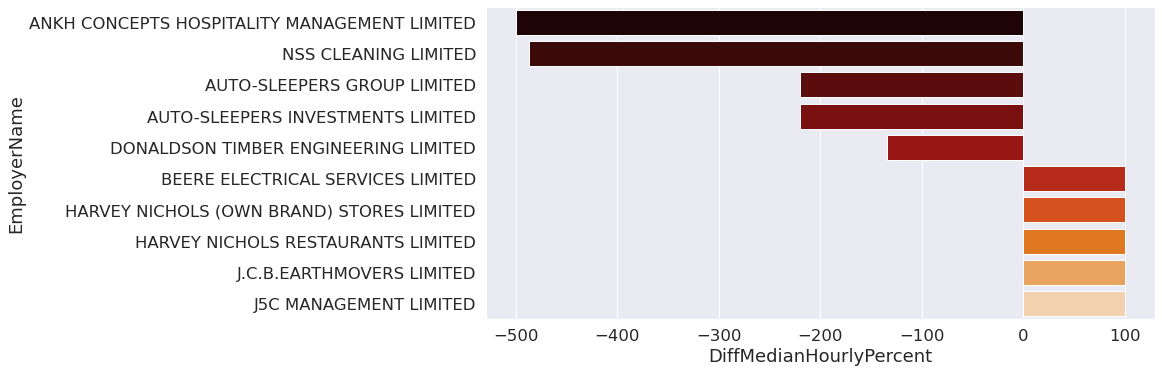

In [33]:
sns.barplot(data=final.highlow,
            y = "EmployerName",
            x = 'DiffMedianHourlyPercent', 
            orient = "h",
           palette = "gist_heat")
plt.savefig('EmpDiff.pdf')

### 

<AxesSubplot:xlabel='EmployerSize', ylabel='DiffMeanHourlyPercent'>

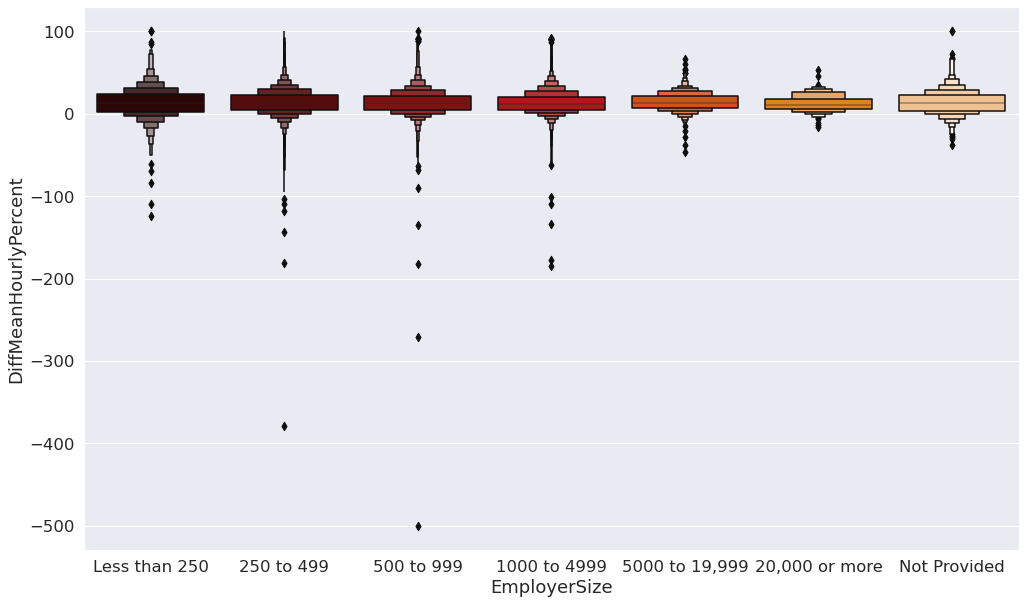

In [39]:
sns.set(rc={'figure.figsize':(16.75,10)}, font_scale = 1.5)
sns.boxenplot(data=final, 
            x = "EmployerSize", 
            y = "DiffMeanHourlyPercent",
            order = ["Less than 250", "250 to 499", "500 to 999", "1000 to 4999",
                    "5000 to 19,999", "20,000 or more", "Not Provided"],
            palette = "gist_heat")